In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id = "2" ></a>
#### <b>What is Customer Churn?</b>
<span style="font-size:16px;">  Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service. </span>

<span style="font-size:16px;"> Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.</span>

<span style="font-size:16px;"> Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more
customers loyalty. The core to succeed in this market lies in the customer itself. 
</span>

<span style="font-size:16px;"> Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.</span>

<a id="churn"></a>
<a id = "3" ></a>

<span style="font-size:16px;"><b>To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.</b></span> 

<span style="font-size:16px;"> To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few. </span> 

<span style="font-size:16px;">As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy. </span> 
<a id="reduce"></a>

<a id = "4" ></a>
#### <b> Objectives</b>
I will explore the data and try to answer some questions like:
* What's the % of Churn Customers and customers that keep in with the active services?
* Is there any patterns in Churn Customers based on the gender?
* Is there any patterns/preference in Churn Customers based on the type of service provided?
* What's the most profitable service types?
* Which features and services are most profitable?
* Many more questions that will arise during the analysis
<a id="objective"></a>

In [2]:
#reding file
customer_churn = pd.read_csv("customer_churn.csv") 

# Exploratory Data Analysis:

##  1. Understanding the data:

In [3]:
#finding the first few rows
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Extracting 5th column
customer_5=customer_churn.iloc[:,4] 
customer_5.head()

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

In [5]:
#Extracting 15th column
customer_15=customer_churn.iloc[:,14] 
customer_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [6]:
#'Extracting male senior citizen with payment method-> electronic check'
senior_male_electronic=customer_churn[(customer_churn['gender']=='Male') & (customer_churn['SeniorCitizen']==1) & (customer_churn['PaymentMethod']=='Electronic check')]
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [7]:
#tenure>70 or monthly charges>100
customer_total_tenure=customer_churn[(customer_churn['tenure']>70) | (customer_churn['MonthlyCharges']>100)]
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [8]:
#cotract is 'two year', payment method is 'Mailed Check', Churn is 'Yes'
two_mail_yes=customer_total_tenure=customer_churn[(customer_churn['Contract']=='Two year') & (customer_churn['PaymentMethod']=='Mailed check') & (customer_churn['Churn']=='Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [9]:
#Extracting 333 random records
customer_333=customer_churn.sample(n=333)
customer_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3417,3272-VUHPV,Female,0,Yes,Yes,8,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),56.30,401.5,No
4532,2154-KVJFF,Female,0,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,79.75,1111.85,Yes
6071,0401-WDBXM,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.55,7542.25,No
2195,9891-NQDBD,Female,0,Yes,No,28,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,25.55,672.2,No
2617,4588-YBNIB,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.60,19.6,Yes


In [10]:
len(customer_333)

333

In [11]:
#count of levels of churn column
customer_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## 2. Data Visualization:

In [12]:
%matplotlib inline

In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=customer_churn['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=customer_churn['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

- 26.6 % of customers switched to another firm.
- Customers are 49.5 % female and 50.5 % male.

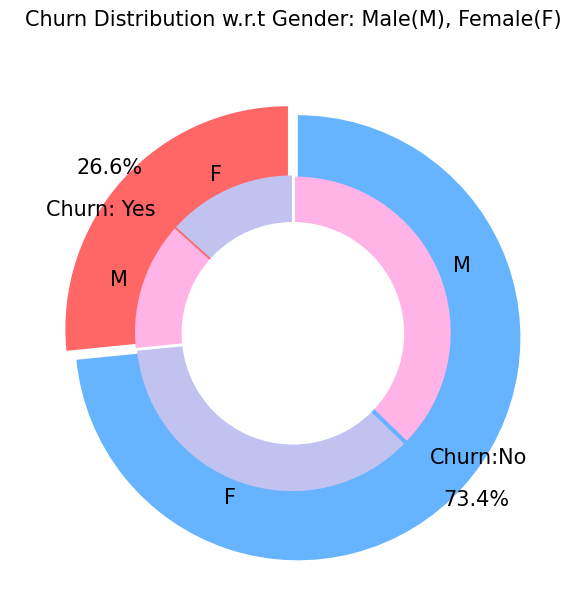

In [16]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

There is negligible difference in customer percentage/ count who chnaged the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

In [19]:
fig = px.histogram(customer_churn, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

In [21]:
labels = customer_churn['PaymentMethod'].unique()
values = customer_churn['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [22]:
fig = px.histogram(customer_churn, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Major customers who moved out were having Electronic Check as Payment Method.
Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

Text(0.5, 1.0, 'Distribution of Internet Service')

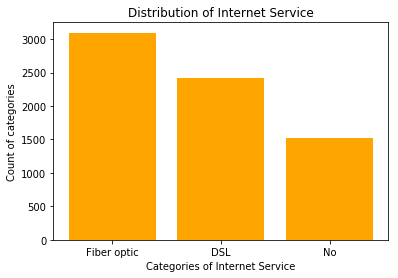

In [14]:
#bar-plot for 'InternetService' column
plt.bar(customer_churn['InternetService'].value_counts().keys().tolist(),customer_churn['InternetService'].value_counts().tolist(),color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service')

In [27]:
fig = px.histogram(customer_churn, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Text(0.5, 1.0, 'Distribution of tenure')

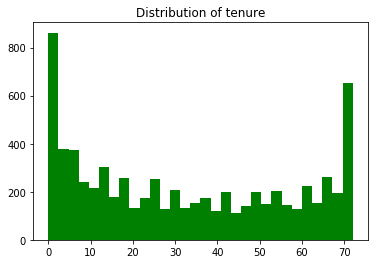

In [15]:
#histogram for 'tenure' column
plt.hist(customer_churn['tenure'],color='green',bins=30)
plt.title('Distribution of tenure')

Text(0.5, 1.0, 'Tenure vs Monthly Charges')

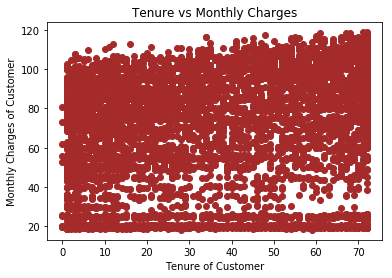

In [29]:
#scatterplot 
plt.scatter(x=customer_churn['tenure'],y=customer_churn['MonthlyCharges'],color='brown')
plt.xlabel('Tenure of Customer')
plt.ylabel('Monthly Charges of Customer')
plt.title('Tenure vs Monthly Charges')

In [26]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(customer_churn, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Most customers churn in the absence of online security,

In [28]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(customer_churn, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.

In [23]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(customer_churn, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers without dependents are more likely to churn

In [24]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(customer_churn, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers that doesn't have partners are more likely to churn

<Axes: title={'center': 'tenure'}, xlabel='[Contract]'>

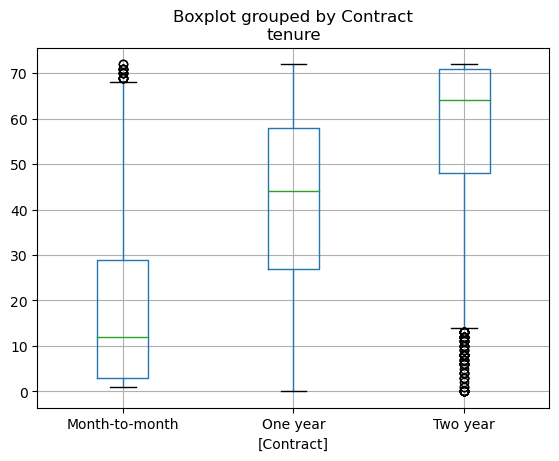

In [29]:
#Box-plot
customer_churn.boxplot(column='tenure',by=['Contract'])

# Model Development:

## 1. Linear Regression Model:

In [30]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [31]:
x=pd.DataFrame(customer_churn['tenure'])
y=customer_churn['MonthlyCharges']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [33]:
#building the model
from sklearn.linear_model import LinearRegression
simpleLinearRegression = LinearRegression()
simpleLinearRegression.fit(x_train,y_train)

LinearRegression()

In [34]:
#predicting the values
y_pred = simpleLinearRegression.predict(x_test)

In [35]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
rmse

29.394584027273893

## 2. Logistic Regression Model:

In [36]:
x=pd.DataFrame(customer_churn['MonthlyCharges'])
y=customer_churn['Churn']

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.65,random_state=0)

In [38]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [39]:
y_pred = logmodel.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_pred,y_test),accuracy_score(y_pred,y_test)

(array([[1815,  651],
        [   0,    0]], dtype=int64),
 0.7360097323600974)

## 3. Multiple Logistic Regression Model:

In [41]:
x=pd.DataFrame(customer_churn.loc[:,['MonthlyCharges','tenure']])
y=customer_churn['Churn']

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=0)

In [43]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [44]:
y_pred = logmodel.predict(x_test)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[934 107]
 [212 156]]
              precision    recall  f1-score   support

          No       0.82      0.90      0.85      1041
         Yes       0.59      0.42      0.49       368

    accuracy                           0.77      1409
   macro avg       0.70      0.66      0.67      1409
weighted avg       0.76      0.77      0.76      1409



## 3. Decision Tree Model:

In [46]:
x=pd.DataFrame(customer_churn['tenure'])
y=customer_churn['Churn']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)  

In [48]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier()

In [49]:
y_pred = classifier.predict(x_test)  

In [50]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_pred))   
print(accuracy_score(y_test, y_pred))  

[[981  64]
 [265  99]]
0.7665010645848119


## 4. Random Forest Model:

In [56]:
x=customer_churn[['tenure','MonthlyCharges']]
y=customer_churn['Churn']

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)  

In [58]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
y_pred=clf.predict(x_test)

In [60]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7352732434350603


Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers. This includes identifying customers who are at risk of churning and working to improve their satisfaction. Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn.